In [1]:
#pip install tensorflow
#pip install tensorflow-datasets

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix

In [3]:
# Завантаження набору даних Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Перетворення міток у one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [4]:
# Назви класів в Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

 Тренування

In [5]:
# Модель нейронної мережі навчанням
model_1 = tf.keras.models.Sequential([
    # Вирівнювальний шар для перетворення вхідних зображень у вектори
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Повнозв'язаний шар з 256 нейронами та функцією активації ReLU
    tf.keras.layers.Dense(256, activation='relu'),
    # Повнозв'язаний шар з 128 нейронами та функцією активації ReLU
    tf.keras.layers.Dense(128, activation='relu'),
    # Вихідний шар з 10 нейронами (відповідає кількості класів) та функцією активації softmax
    tf.keras.layers.Dense(10, activation='softmax')
])


C:\Users\Xiaomi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Компіляція моделі з використанням категоріальної кросс-ентропійної функції втрат, оптимізатора Adam та метрики точності
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Навчання моделі на тренувальних даних 
history_1 = model_1.fit(train_images, train_labels, epochs=25, batch_size = 128, validation_data=(test_images, test_labels))
# Оцінка моделі 1 на тестових даних
test_loss, test_acc = model_1.evaluate(test_images, test_labels, verbose=0)
# Виведення точності та втрат на тестовому наборі
print('Точність на тестовому наборі:', test_acc*100)
print('Loss на тестовому наборі:', test_loss * 100)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9495 - loss: 0.1308 - val_accuracy: 0.8982 - val_loss: 0.3891
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9540 - loss: 0.1218 - val_accuracy: 0.8924 - val_loss: 0.3936
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9554 - loss: 0.1185 - val_accuracy: 0.8889 - val_loss: 0.3742
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9536 - loss: 0.1199 - val_accuracy: 0.8935 - val_loss: 0.4041
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9566 - loss: 0.1128 - val_accuracy: 0.8944 - val_loss: 0.3986
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9585 - loss: 0.1080 - val_accuracy: 0.8936 - val_loss: 0.3978
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9601 - loss: 0.1046 - val_accuracy: 0.8926 - val_loss: 0.4453
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9627 - loss: 0.0975 - val_accuracy: 0.

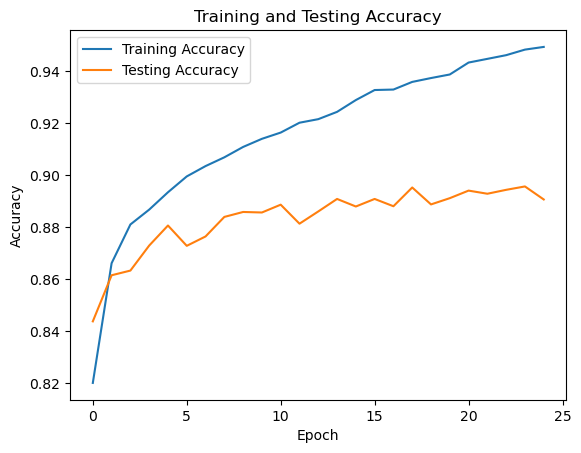

In [8]:
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


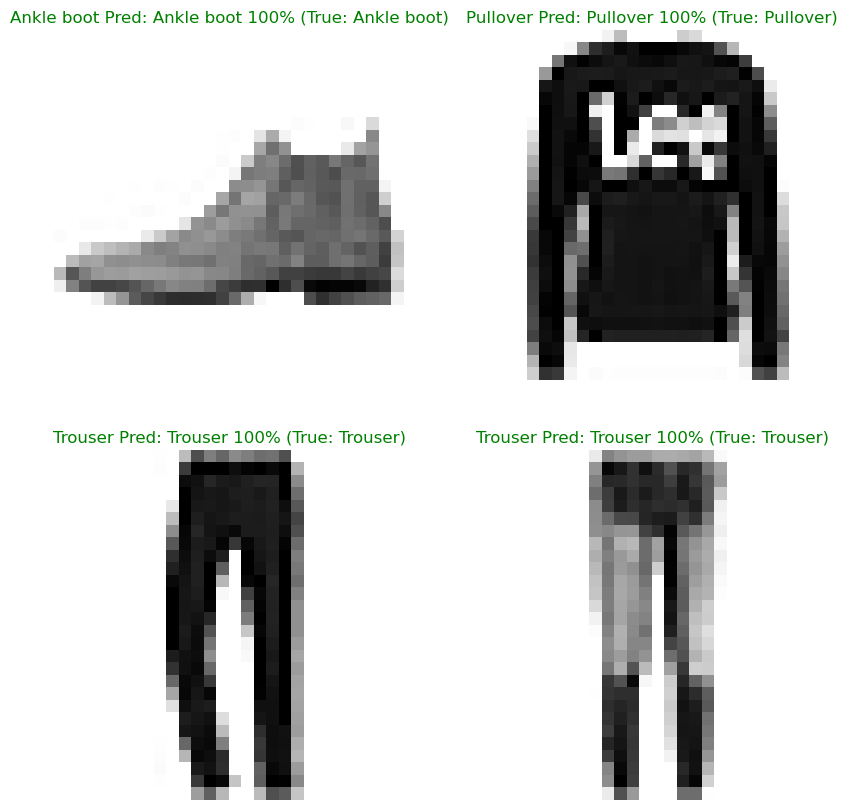

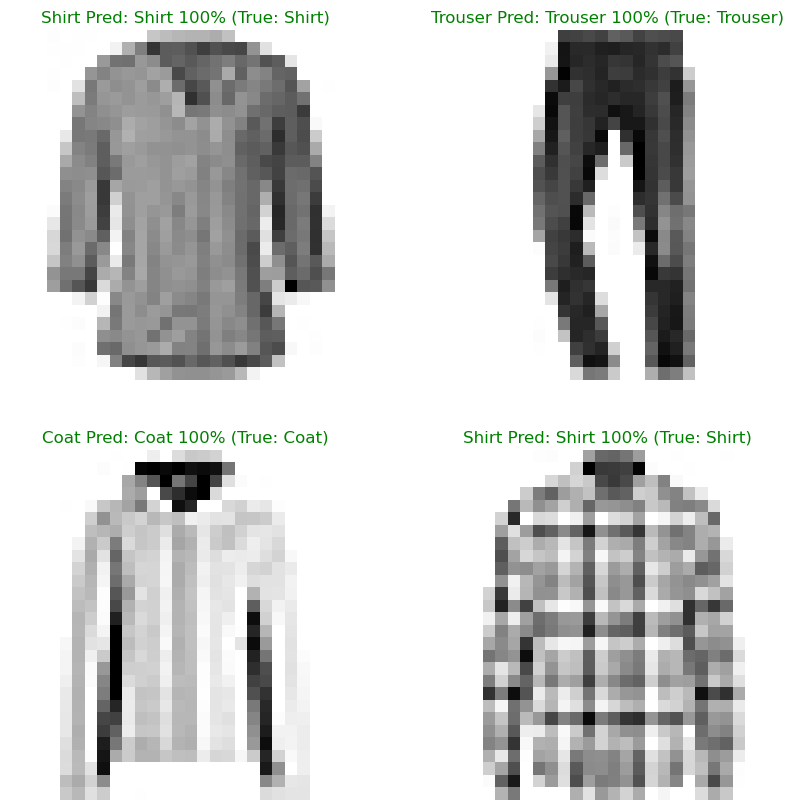

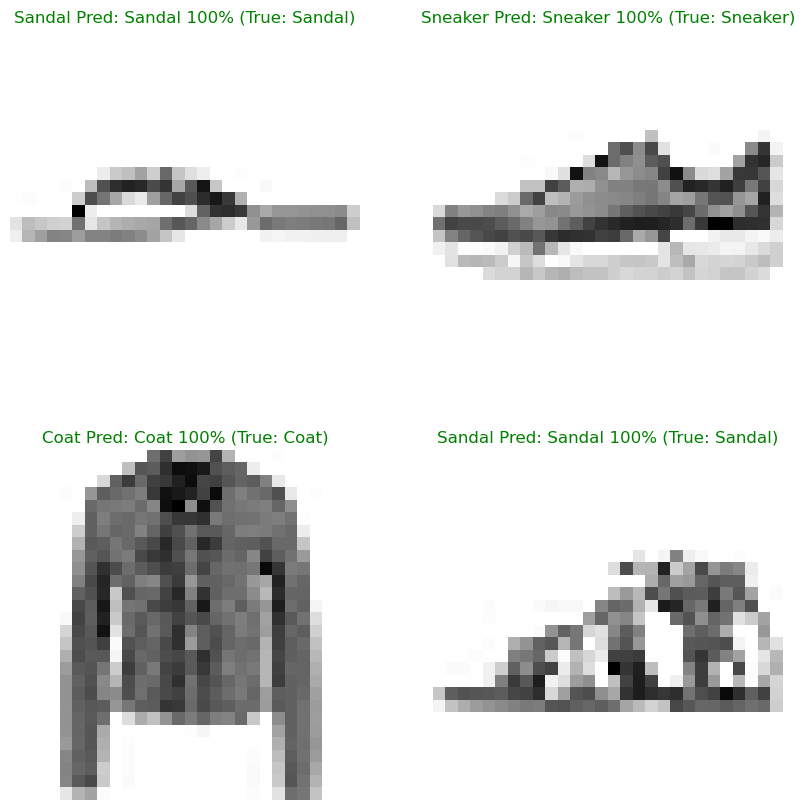

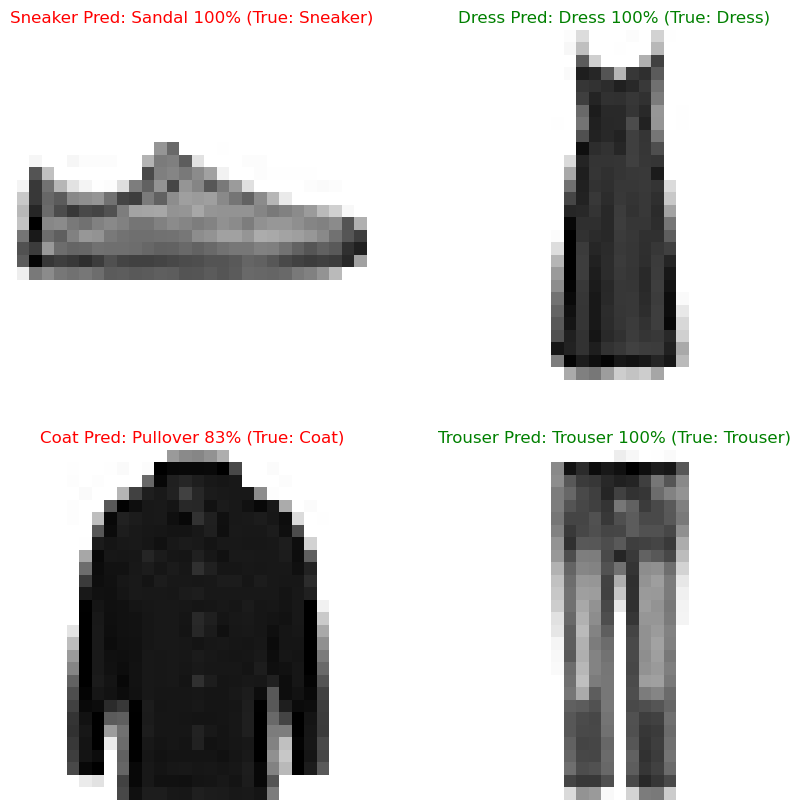

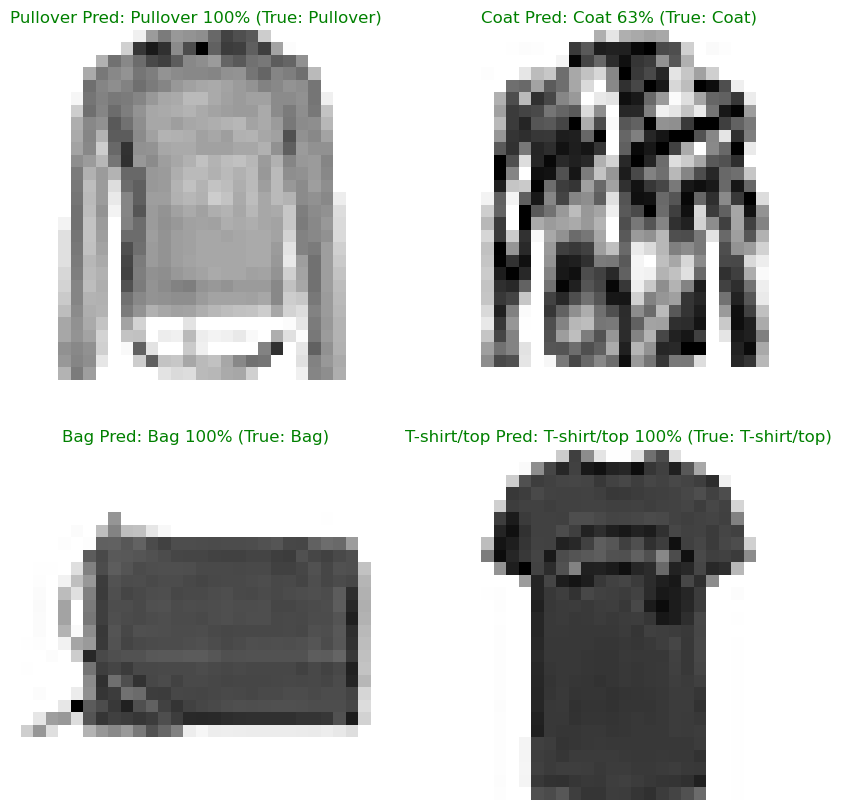

In [25]:
def plot_images(model, images, true_labels, classes, num_images=20):
    num_figures = (num_images + 3) // 4  # Обчислення кількості фігур для виведення
    for fig_num in range(num_figures):
        plt.figure(figsize=(10, 10))
        for i in range(4):
            index = fig_num * 4 + i  # Обчислення індексу зображення
            if index >= num_images:
                break
            ax = plt.subplot(2, 2, i + 1)
            target_image = images[index]
            # Передбачення моделі для цього зображення
            pred_probs = model.predict(target_image.reshape(1, 28, 28))
            pred_label = classes[pred_probs.argmax()]  # Передбачений клас
            true_label_index = true_labels[index].argmax()
            true_label = classes[true_label_index]  # Справжній клас
            plt.imshow(target_image, cmap=plt.cm.binary)
            # Визначення кольору для заголовка в залежності від того, чи правильно модель передбачила клас
            if pred_label == true_label:
                color = "green"
            else:
                color = "red"
            # Виведення інформації про передбачений та справжній класи
            plt.title("{} Pred: {} {:2.0f}% (True: {})".format(classes[true_label_index], pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)
            plt.axis(False)

# Виклик функції для візуалізації зображень та їх передбачень за допомогою моделі 1
plot_images(model_1, test_images, test_labels, class_names)

